In [27]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.options.display.max_rows = 100
pd.options.display.max_columns = None

In [28]:
df = pd.read_csv('MOE_target_columns.csv')
scaled_df = pd.read_csv('scaled_MOE_target_columns.csv')
scaled_df.head()

,Accelerated Stability,volume,hyd_moment,pI_seq,ens_charge,patch_ion,patch_neg,modified_pI_seq,modified_ens_charge
0,0.196851,0.454754,0.269565,0.462793,0.500000,0.237288,0.000000,6.837207,0.500000
1,0.108084,0.270355,0.243257,0.093116,0.142857,0.525424,0.500000,7.206884,0.142857
2,0.180812,0.526838,0.346504,0.516514,0.500000,0.389831,0.105263,6.783486,0.500000
3,0.225032,0.667858,0.539379,0.823916,0.785714,0.305085,0.000000,6.476084,0.785714
4,0.111039,0.647423,0.778420,0.435933,0.428571,0.152542,0.236842,6.864067,0.428571


In [29]:
data_types = df.dtypes
print(data_types)

model                     object
name                      object
mseq                       int64
Query                    float64
Template                  object
comment                   object
Template ID               object
error                    float64
pH                       float64
patch_hyd                  int64
patch_pos                  int64
patch_neg                float64
patch_ion                float64
patch_cdr_hyd              int64
patch_cdr_pos              int64
patch_cdr_neg              int64
patch_cdr_ion              int64
res_hyd                   object
res_pos                   object
res_neg                   object
ens_charge               float64
mass                     float64
pI_3D                    float64
r_gyr                    float64
r_solv                   float64
asa_vdw                  float64
asa_hyd                  float64
asa_hph                  float64
volume                   float64
mobility                 float64
dipole_mom

In [30]:
columns_drop = ['Query', 'error', 'pH']
new_df = df.select_dtypes(include=['int', 'float'])
new_df.drop(columns=['Query', 'error', 'pH'], inplace=True)
new_df

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq,modified_ens_charge
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.1710,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207,0.500000
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.5390,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884,0.142857
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.9050,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486,0.500000
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.0420,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084,0.785714
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.5360,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067,0.428571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,133,430,80,0.184211,0.271186,230,40,150,190,0.500000,25.653990,7.327637,17.717699,23.659315,10547.1310,5915.9258,4165.5684,0.458276,-0.424047,317.80878,0.566590,0.516514,0.145779,6.783486,0.500000
132,134,420,90,0.473684,0.694915,320,50,70,120,0.714286,24.822853,8.045410,17.708420,22.982862,10222.8310,5787.6265,4038.5723,0.436453,3.162036,337.44629,0.508209,0.710505,0.203247,6.589495,0.714286
133,135,470,230,0.263158,0.322034,220,100,180,280,0.500000,24.742920,8.821777,17.639877,22.961054,10174.7400,5781.9902,3982.5945,0.753815,6.360532,499.75851,0.223124,0.435933,0.178019,6.864067,0.500000
134,136,570,90,0.000000,0.135593,330,40,100,140,0.571429,25.467899,7.488770,17.726509,23.342237,10389.3130,6108.8066,3889.8706,0.284922,0.141405,383.33072,0.093087,0.570235,0.099643,6.729765,0.571429


Text(0.5, 1.0, 'Correlation Heatmap of Antibody Descriptors')

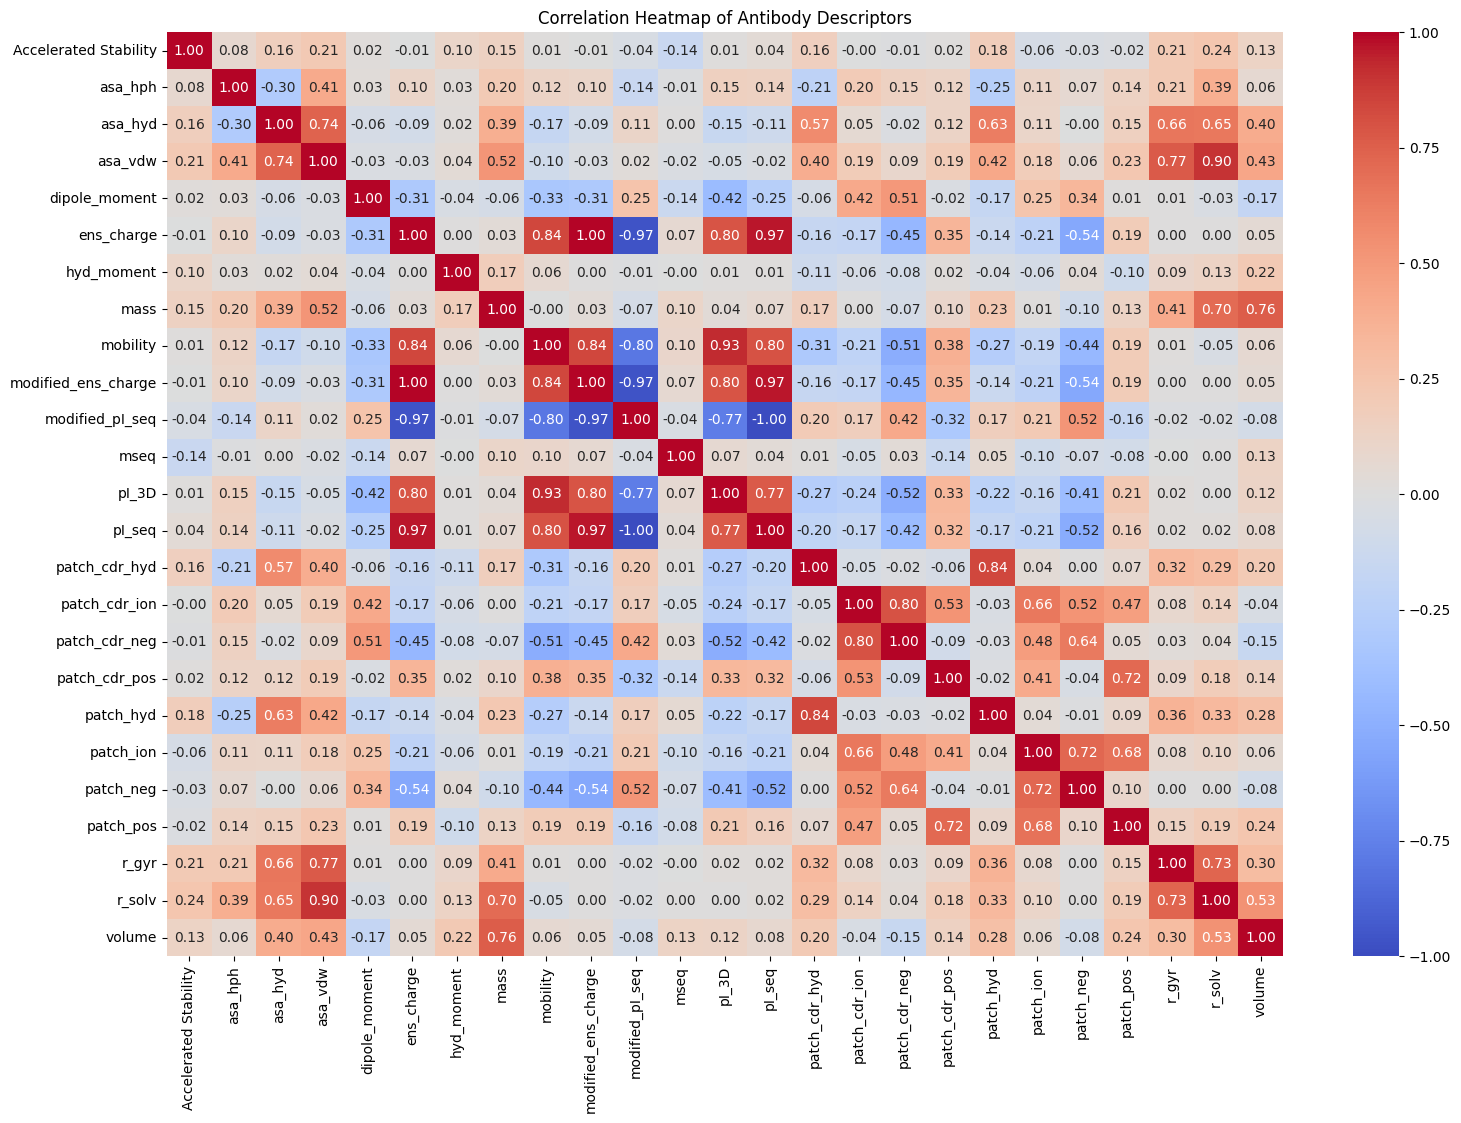

In [31]:
#heatmap of all integer variables
columns_drop = ['Query', 'error', 'pH']
heatmap_df = df.select_dtypes(include=['int', 'float']).columns.difference(columns_drop)
plt.figure(figsize=(18,12))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Antibody Descriptors')

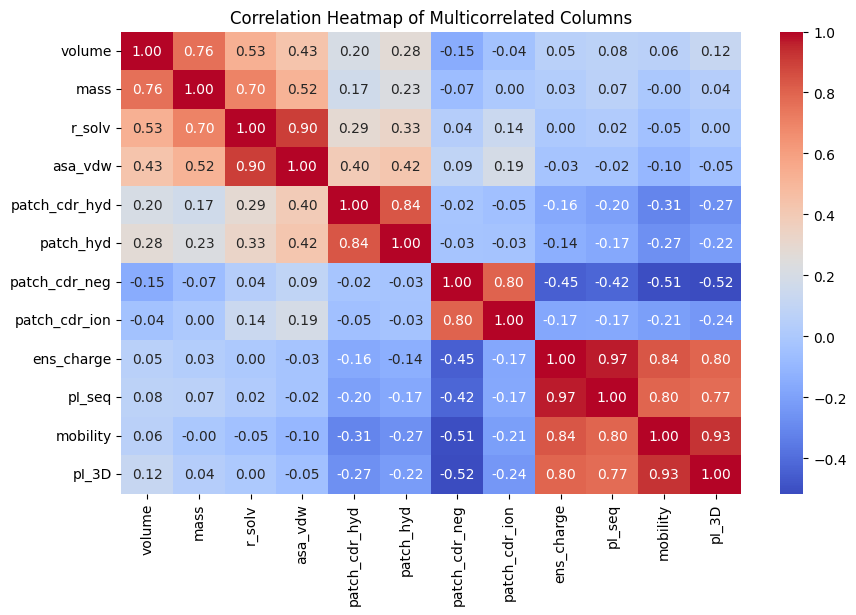

In [32]:
#colinear variables (half of these should be removed)
multico_var = ['volume', 'mass', 'r_solv', 'asa_vdw', 'patch_cdr_hyd', 'patch_hyd', 'patch_cdr_neg', 'patch_cdr_ion', 'ens_charge', 'pI_seq', 'mobility', 'pI_3D']
plt.figure(figsize=(10,6))
sns.heatmap(df[multico_var].corr(), annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Multicorrelated Columns')
plt.show()

Index(['Accelerated Stability', 'volume', 'hyd_moment', 'pI_seq', 'ens_charge',
       'patch_ion', 'patch_neg', 'modified_pI_seq', 'modified_ens_charge'],
      dtype='object')


Text(0.5, 1.0, 'Correlation Heatmap of Colinear Descriptors')

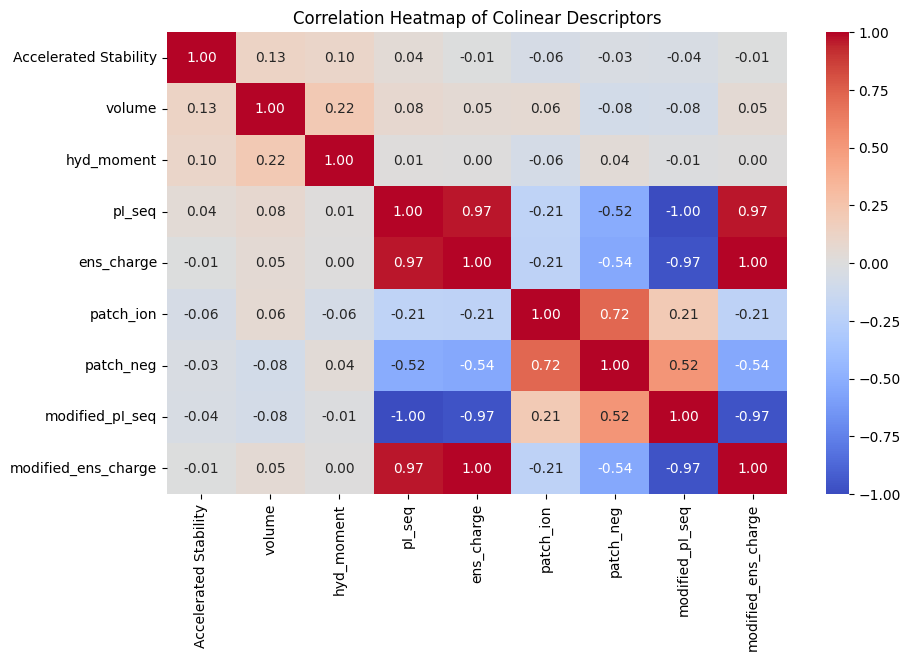

In [33]:
heatmap_df = scaled_df.select_dtypes(include=['int', 'float']).columns
#print heatmap_df columns
print(heatmap_df)

plt.figure(figsize=(10,6))
sns.heatmap(df[heatmap_df].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Colinear Descriptors')

In [34]:
df.drop(columns=['ens_charge'], inplace=True)

In [35]:
# from pycaret.datasets import get_data
# from pycaret.regression import setup, compare_models

# setup(df, target='Accelerated Stability', remove_multicollinearity='vif', multicollinearity_threshold=10)

# best_model = compare_models()

In [36]:
new_df.head()

,mseq,patch_hyd,patch_pos,patch_neg,patch_ion,patch_cdr_hyd,patch_cdr_pos,patch_cdr_neg,patch_cdr_ion,ens_charge,mass,pI_3D,r_gyr,r_solv,asa_vdw,asa_hyd,asa_hph,volume,mobility,dipole_moment,hyd_moment,pI_seq,Accelerated Stability,modified_pI_seq,modified_ens_charge
0,1,530,140,0.000000,0.237288,370,100,0,100,0.500000,24.816916,7.869629,17.579374,23.005478,10208.171,5865.0498,3949.4290,0.454754,3.074778,532.58685,0.269565,0.462793,0.196851,6.837207,0.500000
1,2,370,120,0.500000,0.525424,180,40,190,230,0.142857,24.327295,4.259277,17.767235,23.201422,10425.539,6153.5679,3870.4131,0.270355,-5.937083,734.71277,0.243257,0.093116,0.108084,7.206884,0.142857
2,3,480,190,0.105263,0.389831,230,100,40,140,0.500000,24.932201,7.942871,17.481434,23.139603,10168.905,5872.7959,3852.4263,0.526838,2.456341,144.31454,0.346504,0.516514,0.180812,6.783486,0.500000
3,4,250,180,0.000000,0.305085,0,140,0,140,0.785714,25.238771,9.275879,17.646730,23.115566,10227.042,5821.3716,4019.7937,0.667858,7.807053,267.53702,0.539379,0.823916,0.225032,6.476084,0.785714
4,5,540,0,0.236842,0.152542,250,0,50,50,0.428571,25.327526,7.430176,17.739100,23.234877,10287.536,6008.0742,3814.0925,0.647423,0.067589,277.54608,0.778420,0.435933,0.111039,6.864067,0.428571


Random Forest Mean Squared Error: 0.06113746262081925


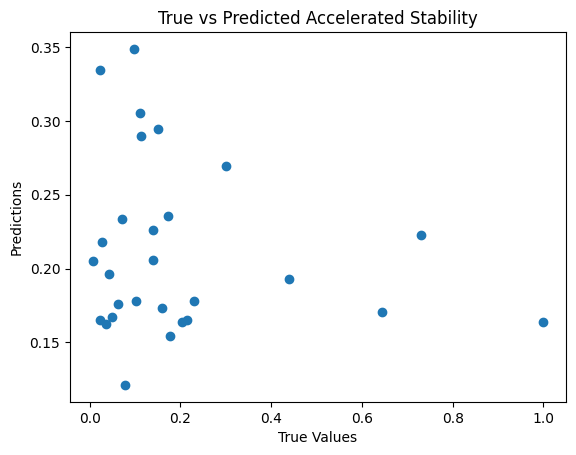

LinearRegression()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
 
X = new_df.drop(columns=['Accelerated Stability']) # X has all features
y = new_df['Accelerated Stability'] # Y has all the targets
 
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()  # Reshape y correctly
 
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)
 
# Instantiate and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
 
# Predict on test set
y_pred_rf = rf_regressor.predict(X_test)
 
# Calculate mean squared error
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)


plt.scatter(y_test, y_pred_rf)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Accelerated Stability')
plt.show()

In [39]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = new_df.drop(columns=['Accelerated Stability'])
y = new_df['Accelerated Stability']
#remove nan and imput for both x and y

X = X.dropna()
y = y.dropna()
X = X.to_numpy()
y = y.to_numpy()
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
y_imputed = imputer.fit_transform(y)

k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

models = {
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Support Vector Machine': make_pipeline(StandardScaler(), SVR()),
    'Neural Network': MLPRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_imputed, y_imputed, cv=kf, scoring='neg_mean_squared_error')
    results[name] = np.sqrt(-scores)
    
for name, scores in results.items():
    print(f'{name}: Mean RMSE: {np.mean(scores):.4f}, Standard Deviation RMSE: {np.std(scores):.4f}')


ValueError: Expected 2D array, got 1D array instead:
array=[0.19685065 0.10808442 0.18081169 0.22503247 0.11103896 0.2461039
 0.19675325 0.24405844 0.17077922 0.1474026  0.43961039 0.09512987
 0.72987013 0.31253247 0.42272727 0.23376623 0.00621429 0.35844156
 0.07198052 0.13931818 0.25944805 0.15548701 0.19396104 0.54123377
 0.18850649 0.84415584 0.17162338 0.02694805 0.10694805 0.49220779
 0.22282468 0.0500974  0.04805195 0.10808442 0.19525974 0.10954545
 0.04220779 0.01623377 0.34025974 0.01623377 0.14980519 0.30733766
 0.10159091 0.66850649 0.11298701 0.03580844 0.23237013 0.2412987
 0.16603896 0.22551948 0.07782468 0.13850649 0.19564935 0.25094156
 0.11801948 0.05435065 0.23282468 0.16344156 0.24769481 0.11863636
 1.         0.21993506 0.64318182 0.14383117 0.22866883 0.60454545
 0.09795455 0.1449026  0.54025974 0.30029221 0.03149351 0.12262987
 0.17207792 0.02188312 0.23331169 0.06948052 0.17542208 0.16074675
 0.13412338 0.16084416 0.14055195 0.07717532 0.08246753 0.15769481
 0.10529221 0.05779221 0.09318182 0.10954545 0.95292208 0.16133117
 0.16269481 0.1562013  0.3024026  0.25094156 0.19704545 0.13525974
 0.13412338 0.08347403 0.29720779 0.19061688 0.12467532 0.14340909
 0.23850649 0.2087987  0.52532468 0.02189286 0.09525974 0.32207792
 0.21808442 0.16344156 0.10814935 0.17811688 0.17597403 0.51753247
 0.0588961  0.05941558 0.4775974  0.1450974  0.21688312 0.07012987
 0.21512987 0.02564935 0.         0.16285714 0.05876623 0.04137338
 0.15853896 0.07327922 0.06133117 0.08941558 0.24045455 0.14577922
 0.20324675 0.17801948 0.09964286].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
#leave one pair out cross validation